# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2  

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


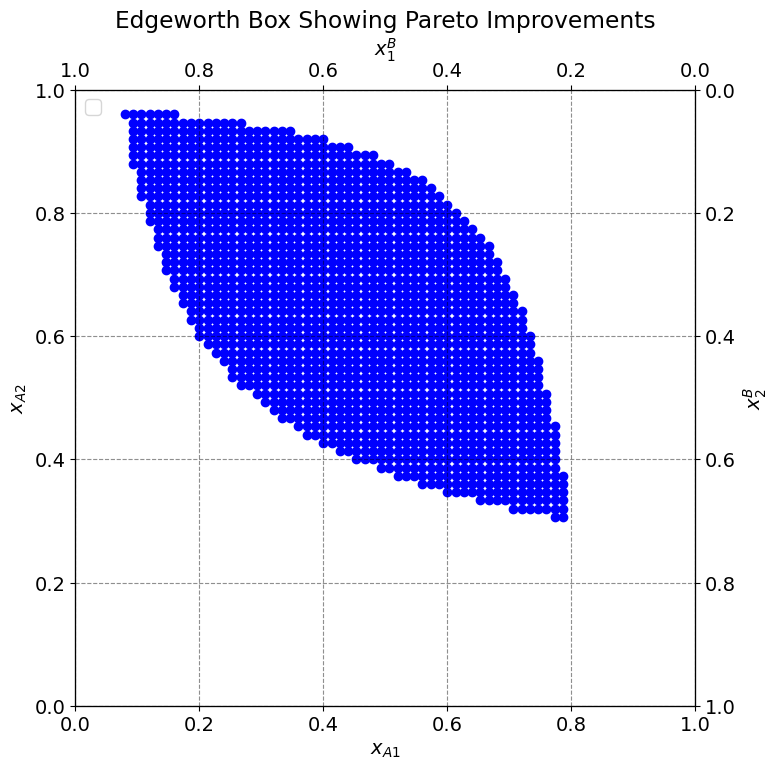

In [6]:
# code for solving the model (remember documentation and comments)
from inauguralproject import ExchangeEconomyClass

model=ExchangeEconomyClass()

# Initialize the model
model = ExchangeEconomyClass()

# Define the range of combinations
N = 75
x_range = np.linspace(0, 1, N + 1)

# Initialize lists to store valid combinations
valid_xA1 = []
valid_xA2 = []

# Calculate utility at the endowment point
u_A_endowment = model.utility_A(model.par.w1A, model.par.w2A)
u_B_endowment = model.utility_B(model.par.w1B, model.par.w2B)

# Iterate over all combinations
for xA1 in x_range:
    for xA2 in x_range:
        # Calculate utility for player A and B
        u_A = model.utility_A(xA1, xA2)
        u_B = model.utility_B(1 - xA1, 1 - xA2)  # xB1 = 1 - xA1, xB2 = 1 - xA2
        
        # Check if the combination satisfies Pareto improvement
        if u_A >= u_A_endowment and u_B >= u_B_endowment:
            valid_xA1.append(xA1)
            valid_xA2.append(xA2)

plt.figure(figsize=(8, 8))

# Scatter plot for Pareto improvements for A
plt.scatter(valid_xA1, valid_xA2, color='blue', label='Pareto Improvements for A')

# Setting primary axis labels for A's allocations
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')

# Setting the limits for the primary axes from 0 to 1
plt.xlim(0, 1)
plt.ylim(0, 1)

# Creating secondary axes for B's allocations
ax2 = plt.twiny()  # Create a second x-axis sharing the same y-axis
ax3 = plt.twinx()  # Create a second y-axis sharing the same x-axis

# Setting the limits for the secondary axes from 0 to 1
ax2.set_xlim(0, 1)
ax3.set_ylim(0, 1)

# Setting labels for B's allocations, which are complements to A's allocations
ax2.set_xlabel('$x_1^B$')
ax3.set_ylabel('$x_2^B$')

# Inverting the direction of the secondary axes to reflect B's perspective
ax2.xaxis.set_label_position('top') 
ax3.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax3.yaxis.tick_right()
ax2.invert_xaxis()
ax3.invert_yaxis()

plt.title('Edgeworth Box Showing Pareto Improvements')
plt.grid(True)
plt.legend(loc='upper left')

plt.show()

# Question 2

Explain your code and procedure

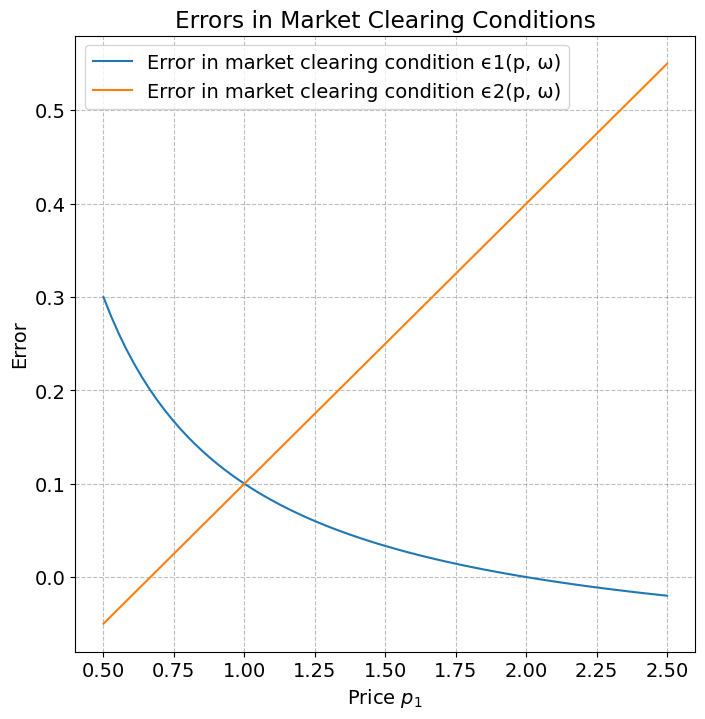

In [7]:
# Initialize the model
model = ExchangeEconomyClass()

# Define the set of prices P1
N = 75
P1 = np.linspace(0.5, 2.5, N)

# Initialize lists to store errors
errors_1 = []
errors_2 = []

# Iterate over each price in P1
for p1 in P1:
    # Calculate demand quantities for both players
    x1A, x2A = model.demand_A(p1)
    x1B, x2B = model.demand_B(p1)
    
    # Calculate errors
    error_1 = x1A - model.par.w1A + x1B - (1 - model.par.w1A)
    error_2 = x2A - model.par.w2A + x2B - (1 - model.par.w2A)
    
    # Append errors to the list
    errors_1.append(error_1)
    errors_2.append(error_2)

# Plot the errors
plt.figure(figsize=(8, 8))
plt.plot(P1, errors_1, label='Error in market clearing condition ϵ1(p, ω)')
plt.plot(P1, errors_2, label='Error in market clearing condition ϵ2(p, ω)')
plt.xlabel('Price $p_1$')
plt.ylabel('Error')
plt.title('Errors in Market Clearing Conditions')
plt.grid(True)
plt.legend()
plt.show()

# Question 3

Explain your code and procedure

In [8]:
# code

ADD CONCISE CONLUSION.